In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pip install folium
import folium
from folium.plugins import HeatMap

print(folium.__version__)

Note: you may need to restart the kernel to use updated packages.
0.19.4


# Fatal or Serious Injury Crashes in Charlotte: An Initial Analysis

## Introduction
Traffic safety is a critical concern for urban planning and public safety. Each year, numerous crashes result in fatalities or serious injuries, 
leading to tragic losses and substantial economic costs. In Charlotte, understanding the patterns and causes of these severe crashes can help 
in designing better safety measures, improving infrastructure, and informing policy decisions to reduce traffic-related injuries and deaths.

This project aims to analyze patterns in fatal or serious injury crashes in Charlotte using historical crash data. By examining factors such as 
time of day, primary causes, and seasonal trends, we hope to uncover insights that can contribute to improved traffic management strategies. 
Specifically, this analysis seeks to answer key questions, including:
- What time of day do most severe crashes occur?
- What are the primary causes of these crashes?
- Are there specific days of the week or months with higher crash frequencies?
- Are there geographic hotspots where severe crashes are more common?

By answering these questions, this analysis can support data-driven decision-making for local authorities and urban planners to enhance road 
safety measures and mitigate the risks of severe traffic incidents.

## Data Overview
This dataset, obtained from the [City of Charlotte's Open Data Portal](https://data.charlottenc.gov/datasets/charlotte::fatal-or-serious-injury-crashes/about), 
contains records of fatal or serious injury crashes in Charlotte. The data helps identify patterns in crash timing, causes, and locations to support 
safer urban planning and traffic management.

### **Key Features**
- **DATE_VAL_Y, DATE_VAL_M, DATE_VAL_D**: The year, month, and day of the crash.
- **DAY_OF_W_1**: The day of the week when the crash occurred.
- **MILT_TIME**: The time of the crash in military format.
- **CRASH_TYPE**: The type of crash (e.g., rear-end collision, pedestrian crash).
- **PRIMARY__1**: The primary cause of the crash.
- **LATITUDE, LONGITUDE**: The geographical coordinates of the crash location.

This dataset provides valuable insights into when and where severe crashes occur and what factors contribute to them.

In [7]:
file_path = "Fatal_or_Serious_Injury_Crashes.csv"
df = pd.read_csv(file_path)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           789 non-null    float64
 1   Y           789 non-null    float64
 2   OBJECTID    789 non-null    int64  
 3   CRSH_ID     789 non-null    int64  
 4   DATE_VAL_Y  789 non-null    int64  
 5   DATE_VAL_M  789 non-null    int64  
 6   DATE_VAL_1  789 non-null    object 
 7   DATE_VAL_D  789 non-null    int64  
 8   DAY_OF_WEE  789 non-null    int64  
 9   DAY_OF_W_1  789 non-null    object 
 10  MILT_TIME   789 non-null    int64  
 11  CASE_NUM    789 non-null    int64  
 12  CRSH_TYPE_  789 non-null    int64  
 13  CRASH_TYPE  789 non-null    object 
 14  CRSH_LEVL   789 non-null    int64  
 15  PRIMARY_CA  757 non-null    float64
 16  PRIMARY__1  757 non-null    object 
 17  SECONDARY_  20 non-null     float64
 18  SECONDARY1  20 non-null     object 
 19  LATITUDE    789 non-null    f

## Data Pre-Processing
Before analyzing the dataset, I performed the following pre-processing steps:

1. **Drop columns with excessive missing values**:  
   - Columns like `StreetID` and `SECONDARY_` contained little or no data, making them irrelevant to the analysis. Removing them ensures that we focus on meaningful features.
2. **Handle missing values**:  
   - Checking for missing values allows us to identify potential gaps in the data.
   - If key variables such as `PRIMARY__1` (Primary Cause) have missing values, it could impact our ability to analyze crash causes.
   - For this dataset, we proceed without imputation since removing missing values would lead to significant data loss.
3. **Convert time into a usable format**:  
   - The `MILT_TIME` column is recorded in a four-digit military time format (e.g., 0930 for 9:30 AM, 1515 for 3:15 PM).
   - To analyze crashes by hour, we extract the first two digits to create an `Hour` column.
   - This transformation allows us to determine when crashes are most likely to occur, helping identify peak accident times.

These steps ensure data quality and make the dataset easier to analyze.

In [8]:
columns_to_drop = ['StreetID', 'SECONDARY_', 'SECONDARY1']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

missing_values = df.isnull().sum()
print("\nMissing Values: \n", missing_values[missing_values > 0])

df['Hour'] = df['MILT_TIME'].astype(str).str.zfill(4).str[:2].astype(int)
print(df[['Hour', 'MILT_TIME']].head())


Missing Values: 
 PRIMARY_CA    32
PRIMARY__1    32
dtype: int64
   Hour  MILT_TIME
0    15       1518
1    13       1329
2    13       1344
3     9        952
4     2        204


## Data Visualizations
### Crashes by Hour of the Day
We visualize the distribution of crashes throughout the day to identify peak crash hours. This helps determine whether crashes  are more likely to occur during high-traffic periods.

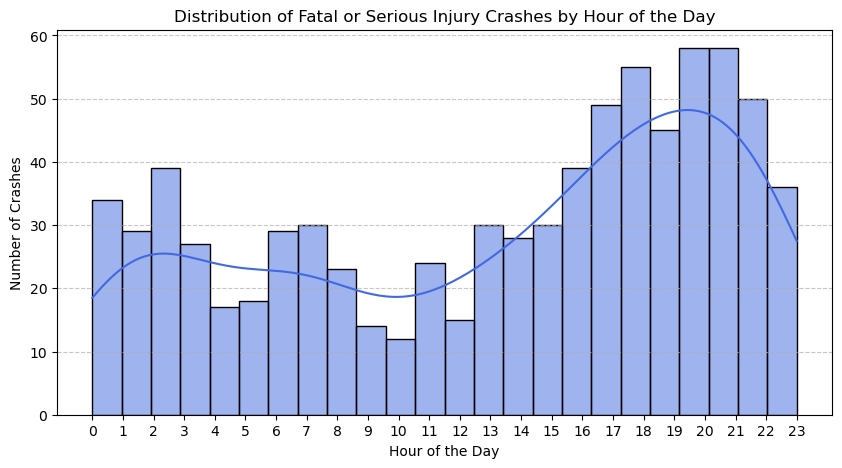

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(df['Hour'], bins=24, kde=True, color='royalblue')
plt.title('Distribution of Fatal or Serious Injury Crashes by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Crashes by Day of the Week

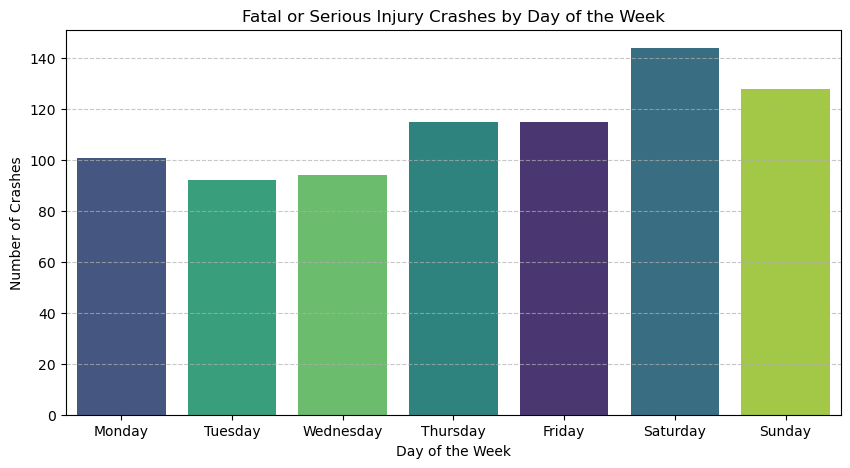

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='DAY_OF_W_1', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis', hue='DAY_OF_W_1', legend=False)
plt.title('Fatal or Serious Injury Crashes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Crashes by Primary Cause

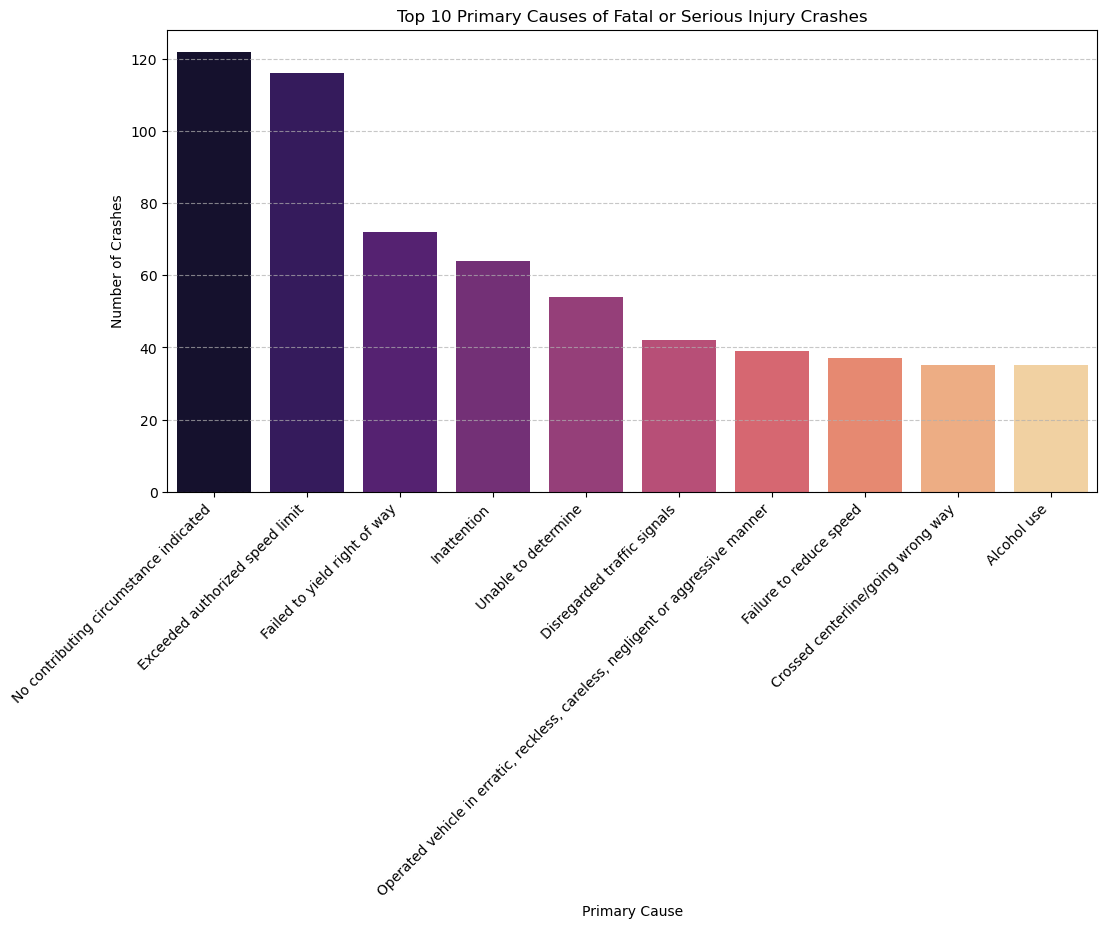

In [11]:
plt.figure(figsize=(12,6))
top_causes = df['PRIMARY__1'].value_counts().head(10)
sns.barplot(x=top_causes.index, y=top_causes.values, palette='magma', hue=top_causes.index, legend=False)
plt.title('Top 10 Primary Causes of Fatal or Serious Injury Crashes')
plt.xlabel('Primary Cause')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Geographic Crash Hotspots
A heatmap of crash locations reveals high-density crash areas, particularly in high-traffic intersections and highways. Identifying these hotspots allows for targeted infrastructure improvements, such as adding better signage, pedestrian crossings, or speed enforcement measures. This visualization complements the time-based and cause-based analyses by showing where interventions might be most needed.

In [14]:
charlotte_map = folium.Map(location=[35.2271, -80.8431], zoom_start=12)
heat_data = df[['LATITUDE', 'LONGITUDE']].dropna().values.tolist()
HeatMap(heat_data).add_to(charlotte_map)
charlotte_map.save('charlotte_heatmap.html')
charlotte_map

## Insights from the Visualization
The histogram above shows the distribution of crashes throughout the day. A noticeable peak is seen during the morning and evening rush hours, 
which suggests that increased traffic density contributes to a higher number of serious crashes. This insight could be used to improve road safety 
by implementing better traffic management strategies or targeted awareness campaigns for high-risk time periods.

## Impact of Findings
The findings from this analysis could have several implications:
- **Potential Benefits**: Identifying high-risk hours allows for better traffic control measures, such as adjusting traffic signals or increasing law enforcement presence.
- **Possible Harms**: If interventions disproportionately focus on certain areas without considering broader traffic conditions, it could lead to inequitable enforcement.
- **Missing Perspectives**: The dataset lacks demographic details, which could help in assessing whether certain groups are more affected by severe crashes.
- **Weather Conditions**: The dataset does not include weather data at the time of the crash, which is a critical factor in understanding accident causes. Including weather variables such as rain, fog, or icy conditions could provide a more complete picture of crash risks.
- The **primary cause analysis** shows that the most frequent cause is labeled as "No contributing circumstance indicated." This suggests a potential gap in crash reporting, where crucial details about the causes of accidents may be missing. 
  - This could imply that many crashes lack thorough investigation or proper documentation, limiting the dataset's effectiveness in guiding policy decisions.
  - Future research or policy changes could aim to improve data collection efforts to provide clearer insights into why these accidents occur.

By recognizing these limitations, we can ensure that data-driven decisions remain fair and effective.

## References
[City of Charlotte Open Data Portal - Fatal or Serious Injury Crashes](https://data.charlottenc.gov/datasets/charlotte::fatal-or-serious-injury-crashes/about)
